In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check dataset in datasets folder
raw_data = pd.read_csv('../DataSets/binianmalignent.csv')
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


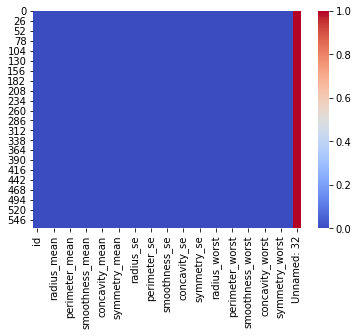

In [3]:
sns.heatmap(raw_data.isnull() , cmap='coolwarm')
# red indicate's that column has null values

## Data Preprocessing 

In [4]:
# replace labels with integer number

In [5]:
raw_data['diagnosis'].replace(to_replace = ['B','M'] , value = [ 1 , 0 ], inplace =True)

In [6]:
i = int((raw_data[raw_data['diagnosis'] == 0]).shape[0] * .75)
training_data_malignant = raw_data[raw_data['diagnosis'] == 0].iloc[ : i,:]
testing_data_malignant = raw_data[raw_data['diagnosis'] == 0].iloc[i : ,:]

training_data_benign = raw_data[raw_data['diagnosis'] == 1].iloc[ : i,:]
testing_data_benign = raw_data[raw_data['diagnosis'] == 1].iloc[i :i + testing_data_malignant.shape[0] ,:]


# we calculate the probability of something to be a BENIGH 

In [7]:
training_data = training_data_benign.append(training_data_malignant)   # now it contain 50-50 % of both type of data
testing_data = testing_data_benign.append(testing_data_malignant)

training_label = training_data['diagnosis']
training_data.drop(['id','diagnosis','Unnamed: 32'] , axis=1 , inplace = True)

testing_label = testing_data['diagnosis']
testing_data.drop(['id','diagnosis','Unnamed: 32'] , axis=1 , inplace = True)
training_data.head()

training_data['bias'] = np.ones([training_data.shape[0],1] , dtype=int)
training_data.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,bias
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [8]:
# Normalizing zero mean

In [9]:
training_data = training_data / np.mean(training_data)
testing_data = testing_data / np.mean(testing_data)
training_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,bias
19,0.929205,0.741140,0.919373,0.813183,0.996328,0.728577,0.654693,0.858440,1.017570,0.916864,...,0.741277,0.888404,0.741140,1.064016,0.642194,0.788240,1.020162,0.989109,0.847875,1.0
20,0.897637,0.810815,0.900136,0.746698,1.095258,1.138262,0.448775,0.558408,1.061835,1.083031,...,0.788617,0.856236,0.657042,0.969437,1.005489,0.623337,0.576851,1.057885,0.955801,1.0
21,0.652228,0.642046,0.634290,0.393309,1.043297,0.581858,0.290407,0.372751,0.979782,1.097978,...,0.602720,0.580359,0.328156,0.978303,0.415814,0.292440,0.493210,0.814013,0.907912,1.0
37,0.894206,0.950682,0.868390,0.752155,0.915228,0.337535,0.251699,0.524832,0.791923,0.932288,...,0.877909,0.752604,0.568881,0.716807,0.167304,0.159396,0.397055,0.660181,0.720559,1.0
46,0.562464,0.869136,0.543572,0.289920,0.876206,0.532653,0.156010,0.106241,0.954950,1.034056,...,0.845194,0.510231,0.252396,0.958353,0.491516,0.226908,0.203082,1.031637,0.865395,1.0


### Lets check most dependent features

In [10]:
def heatmap(data):
    """ Pass covariance or correlation with data"""
    plt.figure(figsize=[15,15])
    sns.heatmap(data ,cmap='coolwarm' , annot_kws={'size': 7},
            cbar = True,  square = True, annot=True, fmt= '.1f')
    plt.show()
#heatmap(training_data.corr())

In [11]:
a  = training_data.columns.tolist()
a.reverse()
#heatmap((training_data[a].corr()))

# we have 30 features and 2 labels i.e either data has malignent or benign
# We use 30 neurons in input layer , 30-30 neurons in 2 hidden layers, and 1 neuron in output layer

In [12]:
training_data = np.array(training_data)
testing_data = np.array(testing_data)
training_label = np.array(training_label)
testing_label = np.array(testing_label)
training_data

array([[0.92920532, 0.74113964, 0.91937318, ..., 0.98910888, 0.84787479,
        1.        ],
       [0.89763704, 0.81081502, 0.90013636, ..., 1.05788467, 0.95580099,
        1.        ],
       [0.65222801, 0.64204576, 0.63428971, ..., 0.81401302, 0.90791166,
        1.        ],
       ...,
       [1.61341337, 1.25260857, 1.63039997, ..., 0.8615248 , 0.90382354,
        1.        ],
       [1.35057316, 1.11893505, 1.36549939, ..., 1.34395211, 0.92484813,
        1.        ],
       [1.08087029, 0.99197102, 1.12582744, ..., 1.41040215, 1.22643412,
        1.        ]])

In [13]:
class NeuralNetwork():

    def __init__(self , lmda = 0):
        self.input_layer_n = 31
        self.hidden_layer1_n = 31
        self.hidden_layer2_n = 31
        self.output_layer = 1
        self.lmda = lmda
        
        self.theta_layer_1 = np.random.randn(self.input_layer_n , self.hidden_layer1_n)
        self.theta_layer_2 = np.random.randn(self.hidden_layer1_n , self.hidden_layer2_n)
        self.theta_layer_3 = np.random.randn(self.hidden_layer2_n , self.output_layer)
        
    def sigmoid(self, activation , theta ):
         return (1 / (1 + np.exp(-np.matmul(activation , theta))))
        
    def forwardPropagation(self , X ):
        self.activation_layer_0 = X
        self.activation_layer_1 = self.sigmoid(self.activation_layer_0 , self.theta_layer_1)
        self.activation_layer_2 = self.sigmoid(self.activation_layer_1 , self.theta_layer_2)
        self.activation_layer_3 = self.sigmoid(self.activation_layer_2 , self.theta_layer_3)
        return self.activation_layer_3
    
    def costFunction(self, X , y):
        self.y_cap = self.forwardPropagation(X)  # We use lesso regularization here adding lamda * theta's
        c = (-1/X.shape[0]) * np.sum((np.dot(y.T , np.log(self.y_cap))  + np.dot(( 1 - y).T , np.log(1-self.y_cap)))) + ((self.lmda / (2 * X.shape[0])) *( (np.sum(self.theta_layer_1**2)) + (np.sum(self.theta_layer_2**2)) + (np.sum(self.theta_layer_1**2)) ))
        return c
    
    def costFunctionDerivative(self,X,y):
        self.y_cap = self.forwardPropagation(X)   # derivative w.r.t all layers activation
        dA_dtheta_layer_1 = np.dot(self.activation_layer_0.T ,(self.activation_layer_1*(1-self.activation_layer_1)))   
        dA_dtheta_layer_2 = np.dot(self.activation_layer_1.T ,(self.activation_layer_2*(1-self.activation_layer_2)))
        dA_dtheta_layer_3 = np.dot(self.activthtation_layer_2.T ,(self.activation_layer_3*(1-self.activation_layer_3)))
        # this is called forward propagation
                            
        dL_dA3 = np.mean( self.y_cap - y) 
        dL_dA2 = np.dot(self.theta_layer_3.T , dA_dtheta_layer_3)
        dL_dA1 = np.dot(self.theta_layer_2.T , dA_dtheta_layer_2)
        # this is called backward propagation error
        
        #print(dA_dtheta_layer_1.shape , dL_dA1.shape)
        #print(dA_dtheta_layer_2.shape , dL_dA2.shape)
        #print(dA_dtheta_layer_3.shape , dL_dA3.shape)
        dL_dtheta_layer_1 =  1/X.shape[0] * (np.multiply(dA_dtheta_layer_1 , dL_dA1) + (self.lmda * self.theta_layer_1))
        dL_dtheta_layer_2 =  1/X.shape[0] * (np.multiply(dA_dtheta_layer_2 , dL_dA2) + (self.lmda * self.theta_layer_2))
        dL_dtheta_layer_3 =  1/X.shape[0] * (np.multiply(dA_dtheta_layer_3 , dL_dA3) + (self.lmda * self.theta_layer_3))
        
        
        return dL_dtheta_layer_1 , dL_dtheta_layer_2 , dL_dtheta_layer_3

In [14]:
def batchGradientDecent(NN , X , y , batch_size = 32):
    alpha = 0.001
    i = 1
    itera = []
    cf = []
    
    while ( i < 2500):
        index = np.random.randint(0,X.shape[0],size = (batch_size,))
        
        initial_cost = NN.costFunction(X[index] , y[index])
        
        t1,t2,t3 = NN.costFunctionDerivative(X[index] , y[index])
        
        NN.theta_layer_1 = NN.theta_layer_1 - alpha * t1
        NN.theta_layer_2 = NN.theta_layer_2 - alpha * t2
        NN.theta_layer_3 = NN.theta_layer_3 - alpha * t3
        
        final_cost = NN.costFunction(X[index] , y[index])
        
        itera.append(i)
        cf.append(final_cost)
        i+=1
        
        print("iteration {} value {}".format(i , final_cost))
        
    return itera , cf

In [22]:
NN = NeuralNetwork(0.02)
#NN = NeuralNetwork()

itera, cf = batchGradientDecent(NN , training_data , training_label )


iteration 2 value 2.145428094773369
iteration 3 value 2.8974217495717447
iteration 4 value 2.0219780748283345
iteration 5 value 2.7080101383583624
iteration 6 value 2.633044149754546
iteration 7 value 2.7319049623875085
iteration 8 value 2.5438403595909067
iteration 9 value 2.3284838359497435
iteration 10 value 2.6556970675346583
iteration 11 value 1.9272490619775704
iteration 12 value 2.795335013323401
iteration 13 value 3.111716657045233
iteration 14 value 2.576965777452752
iteration 15 value 2.533759507287465
iteration 16 value 2.9830350278767246
iteration 17 value 2.4522698392743276
iteration 18 value 2.6438395413869675
iteration 19 value 2.3786863014917956
iteration 20 value 2.670909563770366
iteration 21 value 2.3561641005014224
iteration 22 value 2.660023106967923
iteration 23 value 2.8198050318511676
iteration 24 value 2.627217958081039
iteration 25 value 3.1009018458931528
iteration 26 value 2.4378451163773875
iteration 27 value 2.882685845820157
iteration 28 value 2.742365789

iteration 251 value 2.9418513964414403
iteration 252 value 2.5844874821124
iteration 253 value 3.199632940678206
iteration 254 value 2.603904479015726
iteration 255 value 2.461763738873257
iteration 256 value 2.9256364016144065
iteration 257 value 3.0410043961276365
iteration 258 value 2.734307030182719
iteration 259 value 2.792488840643495
iteration 260 value 2.92208480068601
iteration 261 value 2.7039215520448376
iteration 262 value 2.9723936872618806
iteration 263 value 2.6645711032035866
iteration 264 value 3.0154131215101465
iteration 265 value 2.5644928031156464
iteration 266 value 2.944710766812559
iteration 267 value 2.5844838861135706
iteration 268 value 2.655765281542232
iteration 269 value 2.697630666692995
iteration 270 value 3.0840160661395486
iteration 271 value 3.086058292839376
iteration 272 value 2.6474681941555627
iteration 273 value 2.609510949953041
iteration 274 value 3.2893369501507834
iteration 275 value 2.34645366111639
iteration 276 value 3.170029209195567
iter

iteration 491 value 3.0282874458037297
iteration 492 value 2.3903475757541575
iteration 493 value 2.841796181406263
iteration 494 value 2.9556276580006102
iteration 495 value 2.820949449075025
iteration 496 value 2.531712152835325
iteration 497 value 3.2635795438265545
iteration 498 value 3.036738571301365
iteration 499 value 2.51295279690362
iteration 500 value 2.825879357410219
iteration 501 value 2.8776229998029232
iteration 502 value 3.0518212327485017
iteration 503 value 3.0413187324877473
iteration 504 value 2.8084955739222535
iteration 505 value 2.8889199758273283
iteration 506 value 2.565748435540537
iteration 507 value 2.4816399427183446
iteration 508 value 3.105414673972115
iteration 509 value 2.8207533070220725
iteration 510 value 2.82674201240656
iteration 511 value 2.5753499943190907
iteration 512 value 2.7821550634251606
iteration 513 value 2.978189801882067
iteration 514 value 3.1273214349484415
iteration 515 value 2.693405538463671
iteration 516 value 2.7261047695531047

iteration 721 value 2.089664752688969
iteration 722 value 2.141062074097177
iteration 723 value 2.3329423323287424
iteration 724 value 2.3649226633268183
iteration 725 value 2.3927708184740246
iteration 726 value 1.7250813504242286
iteration 727 value 2.330634709619752
iteration 728 value 2.207045166948241
iteration 729 value 2.341099776419285
iteration 730 value 2.007651229841108
iteration 731 value 2.3602575564542527
iteration 732 value 2.4678336567535215
iteration 733 value 2.7001523716859652
iteration 734 value 1.923553208777709
iteration 735 value 2.1279504453829134
iteration 736 value 1.997635025962044
iteration 737 value 2.194780401602123
iteration 738 value 2.3977101630594824
iteration 739 value 2.1890378838105296
iteration 740 value 2.349518351011357
iteration 741 value 2.1348841265309355
iteration 742 value 2.250991500340886
iteration 743 value 1.8510439093377702
iteration 744 value 2.398198183033741
iteration 745 value 2.5248083982703893
iteration 746 value 2.248912054087936

iteration 962 value 1.897934656012492
iteration 963 value 2.2030661563696055
iteration 964 value 1.9739273746035704
iteration 965 value 1.9549379199204862
iteration 966 value 2.1380827235723885
iteration 967 value 2.1946343495790703
iteration 968 value 1.7797963510997963
iteration 969 value 2.0171748297455627
iteration 970 value 2.0166901986634054
iteration 971 value 2.199492286793114
iteration 972 value 2.257484684091507
iteration 973 value 2.3955126900427706
iteration 974 value 2.084274137450817
iteration 975 value 2.250274541011899
iteration 976 value 2.0159859640987543
iteration 977 value 2.209569150122987
iteration 978 value 2.064466967815394
iteration 979 value 1.7766881689295122
iteration 980 value 2.24655227576024
iteration 981 value 2.0123677438046776
iteration 982 value 1.9034050056028367
iteration 983 value 2.263824453671016
iteration 984 value 2.3249596081229633
iteration 985 value 1.9415798930849175
iteration 986 value 1.888350920915966
iteration 987 value 1.96597510032655

iteration 1195 value 2.022069010804004
iteration 1196 value 2.068281211534841
iteration 1197 value 1.8810973096785926
iteration 1198 value 1.8293957695976026
iteration 1199 value 1.9191333449027257
iteration 1200 value 1.9803209823140273
iteration 1201 value 1.8717748304443538
iteration 1202 value 2.0232907762210033
iteration 1203 value 1.915996375209404
iteration 1204 value 1.9732540345179368
iteration 1205 value 2.3684426573746533
iteration 1206 value 2.023435745222495
iteration 1207 value 2.1694348638561247
iteration 1208 value 2.0767019817412864
iteration 1209 value 1.7212778724613946
iteration 1210 value 1.9705062106826716
iteration 1211 value 2.312455973127245
iteration 1212 value 1.9302184298004252
iteration 1213 value 1.978297149677968
iteration 1214 value 2.072663548012168
iteration 1215 value 2.0160471849413364
iteration 1216 value 2.0706675631142897
iteration 1217 value 1.835312738419455
iteration 1218 value 2.170980806192138
iteration 1219 value 1.8208852140665268
iteration

iteration 1421 value 2.0397088247302397
iteration 1422 value 2.130762507003613
iteration 1423 value 2.0406136584119006
iteration 1424 value 1.8096974779343564
iteration 1425 value 1.947250583151045
iteration 1426 value 1.6708292830849452
iteration 1427 value 2.095753170792287
iteration 1428 value 1.853196182982546
iteration 1429 value 2.0425677445371146
iteration 1430 value 2.134763882756326
iteration 1431 value 2.190997176106561
iteration 1432 value 2.0926693488952677
iteration 1433 value 1.665999549728211
iteration 1434 value 1.9537359410301218
iteration 1435 value 2.0429857680767967
iteration 1436 value 1.8426775677914344
iteration 1437 value 1.8545506731388217
iteration 1438 value 2.054689379765386
iteration 1439 value 1.9987604279194509
iteration 1440 value 2.037950771892314
iteration 1441 value 2.1270749087205214
iteration 1442 value 1.9460680351422797
iteration 1443 value 1.9472613627996262
iteration 1444 value 2.1870115129856686
iteration 1445 value 1.939496800576014
iteration 

iteration 1641 value 1.9032659951811857
iteration 1642 value 1.9455708316879328
iteration 1643 value 2.071180519496706
iteration 1644 value 2.027842522830979
iteration 1645 value 1.8222184374375672
iteration 1646 value 1.8578421281116855
iteration 1647 value 1.9863990854065245
iteration 1648 value 1.9039071348289476
iteration 1649 value 1.9845446324163007
iteration 1650 value 1.8561912619805523
iteration 1651 value 1.9022097262892297
iteration 1652 value 1.9469033990775237
iteration 1653 value 2.118937647663815
iteration 1654 value 2.033503377517483
iteration 1655 value 1.9480058792643442
iteration 1656 value 2.0871608734399034
iteration 1657 value 1.8712757705479628
iteration 1658 value 2.023257397337035
iteration 1659 value 1.8942949406000018
iteration 1660 value 1.9914740909639006
iteration 1661 value 1.95194122967314
iteration 1662 value 1.8149768895266498
iteration 1663 value 1.9830681774991685
iteration 1664 value 1.9508629453533979
iteration 1665 value 1.9879030651354705
iterati

iteration 1884 value 1.920874275148421
iteration 1885 value 1.769797584074873
iteration 1886 value 1.9639731861847243
iteration 1887 value 1.966045434861337
iteration 1888 value 2.0399844039275425
iteration 1889 value 1.8532491886858073
iteration 1890 value 1.9640809172166378
iteration 1891 value 1.9259501833120345
iteration 1892 value 2.0402798289157347
iteration 1893 value 1.8099164879375669
iteration 1894 value 1.7329524420685636
iteration 1895 value 1.9692670917057726
iteration 1896 value 1.8065718384335252
iteration 1897 value 1.9566377360933658
iteration 1898 value 2.002437778407369
iteration 1899 value 2.197977357949664
iteration 1900 value 1.9620910808671237
iteration 1901 value 1.8480726361118238
iteration 1902 value 1.9694005051734007
iteration 1903 value 1.8470675322134833
iteration 1904 value 1.8888094156871418
iteration 1905 value 1.8934389771592937
iteration 1906 value 1.9998540240436962
iteration 1907 value 2.0497972368994297
iteration 1908 value 1.7322700535604985
itera

iteration 2126 value 1.7974917713595762
iteration 2127 value 1.7615076058542227
iteration 2128 value 1.9518090812336188
iteration 2129 value 1.7997094536566172
iteration 2130 value 2.0586916350584215
iteration 2131 value 1.7286244491173937
iteration 2132 value 1.8821096575511
iteration 2133 value 1.9178818114204215
iteration 2134 value 1.8333506443921208
iteration 2135 value 1.9138552275286358
iteration 2136 value 1.8311775559127987
iteration 2137 value 1.914810422731768
iteration 2138 value 1.7629213770302359
iteration 2139 value 1.761350988399109
iteration 2140 value 2.05062802925531
iteration 2141 value 1.9525625602343637
iteration 2142 value 1.949911926843575
iteration 2143 value 1.9103223408821828
iteration 2144 value 2.087051377394679
iteration 2145 value 1.904655928978134
iteration 2146 value 1.905429825255725
iteration 2147 value 1.7536134330923667
iteration 2148 value 2.20029211082348
iteration 2149 value 1.9709878584375562
iteration 2150 value 1.9024681016528524
iteration 215

iteration 2380 value 1.6967121705008168
iteration 2381 value 1.9768577789521224
iteration 2382 value 1.6693163721147524
iteration 2383 value 1.8286604409703893
iteration 2384 value 1.8349658854249595
iteration 2385 value 1.723895070154327
iteration 2386 value 1.7672767345781755
iteration 2387 value 1.8638905828037138
iteration 2388 value 1.7969390978633704
iteration 2389 value 1.793963749219328
iteration 2390 value 1.8058240852452911
iteration 2391 value 1.8075226047185624
iteration 2392 value 1.8513269686123572
iteration 2393 value 1.8113935933066487
iteration 2394 value 1.7329254962934078
iteration 2395 value 1.856852801383147
iteration 2396 value 1.6634747884498908
iteration 2397 value 1.7608195289987365
iteration 2398 value 1.8120376364834834
iteration 2399 value 1.8906484938419377
iteration 2400 value 1.744154203654247
iteration 2401 value 1.7473894936774208
iteration 2402 value 1.7950118362345173
iteration 2403 value 1.7762591243661614
iteration 2404 value 1.6935810181110675
iter

# we use 2 hidden layers with 31*2 = 62 neurons it overfit the output bcz we dont have hug amount of data it's only 318 entries. So we add some bias [ Lasso Regularization ] 

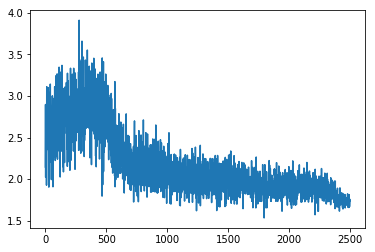

In [23]:
plt.plot(itera , cf)
plt.show()

In [24]:
zzz  = NN.forwardPropagation(training_data)
g = 0
n = []
for i in range(len(zzz)):
    if zzz[i] >= 0.5:
        n.append(1)
    else:
        n.append(0)
print(n )
print('Benign : ',n.count(1) , ' Malignent : ',n.count(0))
zzz

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Benign :  318  Malignent :  0


array([[0.60277853],
       [0.61125271],
       [0.61310566],
       [0.56649095],
       [0.71486156],
       [0.60194772],
       [0.58571096],
       [0.61680463],
       [0.59275195],
       [0.64331507],
       [0.66740464],
       [0.65179109],
       [0.72213222],
       [0.66912875],
       [0.66862976],
       [0.63525825],
       [0.62618176],
       [0.6282166 ],
       [0.5787312 ],
       [0.61875501],
       [0.64219206],
       [0.593655  ],
       [0.64443951],
       [0.59224767],
       [0.58108518],
       [0.61336475],
       [0.62137597],
       [0.58625385],
       [0.58225327],
       [0.5898581 ],
       [0.58116507],
       [0.59036484],
       [0.57321528],
       [0.62965586],
       [0.62375231],
       [0.75347518],
       [0.59323302],
       [0.61271943],
       [0.62629595],
       [0.58190736],
       [0.61265466],
       [0.63821308],
       [0.66599923],
       [0.56568552],
       [0.56885259],
       [0.57906128],
       [0.65894786],
       [0.606

In [18]:
def completeGradientDecent(NN , X , y ):
    alpha = 0.001
    i = 1
    itera = []
    cf = []
    epsilon = 0.00001
    while True:
        
        initial_cost = NN.costFunction(X , y)
        
        t1,t2,t3 = NN.costFunctionDerivative(X , y)
        
        NN.theta_layer_1 = NN.theta_layer_1 - alpha * t1
        NN.theta_layer_2 = NN.theta_layer_2 - alpha * t2
        NN.theta_layer_3 = NN.theta_layer_3 - alpha * t3
        
        final_cost = NN.costFunction(X , y)
        
        itera.append(i)
        cf.append(final_cost)
        i+=1
        
        print("iteration {} value {}".format(i , final_cost))
        
        if(abs(final_cost - initial_cost) < epsilon):
            break
    return itera , cf

#itera, cf = completeGradientDecent(NN , training_data , training_label )